In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 랜덤 데이터프레임 생성 (100개의 샘플, 10개의 컬럼)
np.random.seed(42)  # 재현 가능성을 위해 시드 고정
df = pd.DataFrame(np.random.randn(100, 10), columns=[f'col{i+1}' for i in range(10)])

# 2. 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# 4. 결과 출력
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("각 주성분이 설명하는 분산 비율:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

print("\n누적 설명 분산 비율:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"PC1~PC{i+1}: {cum_var:.4f}")

# 결과를 DataFrame으로 표현하고 싶다면:
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(10)])
print("\nPCA 결과 (처음 5행):")
print(pca_df.head())

각 주성분이 설명하는 분산 비율:
PC1: 0.1560
PC2: 0.1303
PC3: 0.1212
PC4: 0.1122
PC5: 0.1005
PC6: 0.0945
PC7: 0.0887
PC8: 0.0813
PC9: 0.0679
PC10: 0.0475

누적 설명 분산 비율:
PC1~PC1: 0.1560
PC1~PC2: 0.2862
PC1~PC3: 0.4074
PC1~PC4: 0.5196
PC1~PC5: 0.6201
PC1~PC6: 0.7146
PC1~PC7: 0.8033
PC1~PC8: 0.8846
PC1~PC9: 0.9525
PC1~PC10: 1.0000

PCA 결과 (처음 5행):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.340887  0.762896  0.327044  0.545829  0.165354 -1.660275  0.837015   
1 -1.711877 -1.566152  0.295249  1.228621 -0.027160 -0.500783 -0.746821   
2 -1.086134 -0.960892 -1.686631  0.655501  0.189794 -0.568852 -0.667521   
3 -2.475009  0.430927  1.803968 -0.276257  1.031445 -0.048942 -1.098081   
4 -0.428104 -1.424224 -0.252769 -0.328866 -0.917845 -1.361693  0.423173   

        PC8       PC9      PC10  
0 -0.436048  0.685651 -0.255072  
1  0.883417 -1.658825 -0.905607  
2  1.127979 -0.047911 -0.262200  
3 -0.203002  1.098477  1.004387  
4  1.250565 -0.946087 -0.840067  


In [2]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(10)],
                        index=df.columns)

print("\nPCA Loading Matrix (각 변수의 주성분 기여도):")
print(loadings)

# 각 주성분에서 가장 크게 기여하는 변수 확인
for i in range(len(pca.components_)):
    component = loadings.iloc[:, i]
    max_var = component.abs().idxmax()
    print(f"PC{i+1}을 가장 잘 설명하는 변수: {max_var} (기여도: {component[max_var]:.4f})")


PCA Loading Matrix (각 변수의 주성분 기여도):
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
col1   0.117977 -0.142741 -0.609948 -0.198464  0.145293 -0.449136 -0.106781   
col2  -0.557242  0.059693  0.135773 -0.243863 -0.110971 -0.161259  0.509454   
col3  -0.126474  0.528390 -0.175925 -0.020878  0.463069 -0.409288  0.069845   
col4   0.446348  0.219334  0.194960 -0.260182  0.180193  0.074713  0.624741   
col5  -0.171427  0.450976 -0.256204 -0.359982 -0.193713  0.215559 -0.284616   
col6   0.133461 -0.366842 -0.479748  0.138287  0.284000  0.268586  0.334951   
col7   0.410711 -0.050672  0.346122  0.055347 -0.067739 -0.574436 -0.148437   
col8   0.054737  0.129084 -0.327131  0.352038 -0.710921 -0.244803  0.340657   
col9   0.421310  0.055055 -0.112037 -0.574050 -0.293545  0.147203 -0.038850   
col10  0.252903  0.537164 -0.073514  0.477258  0.072977  0.262671 -0.032974   

            PC8       PC9      PC10  
col1   0.362473  0.433517  0.026880  
col2   0.033259  

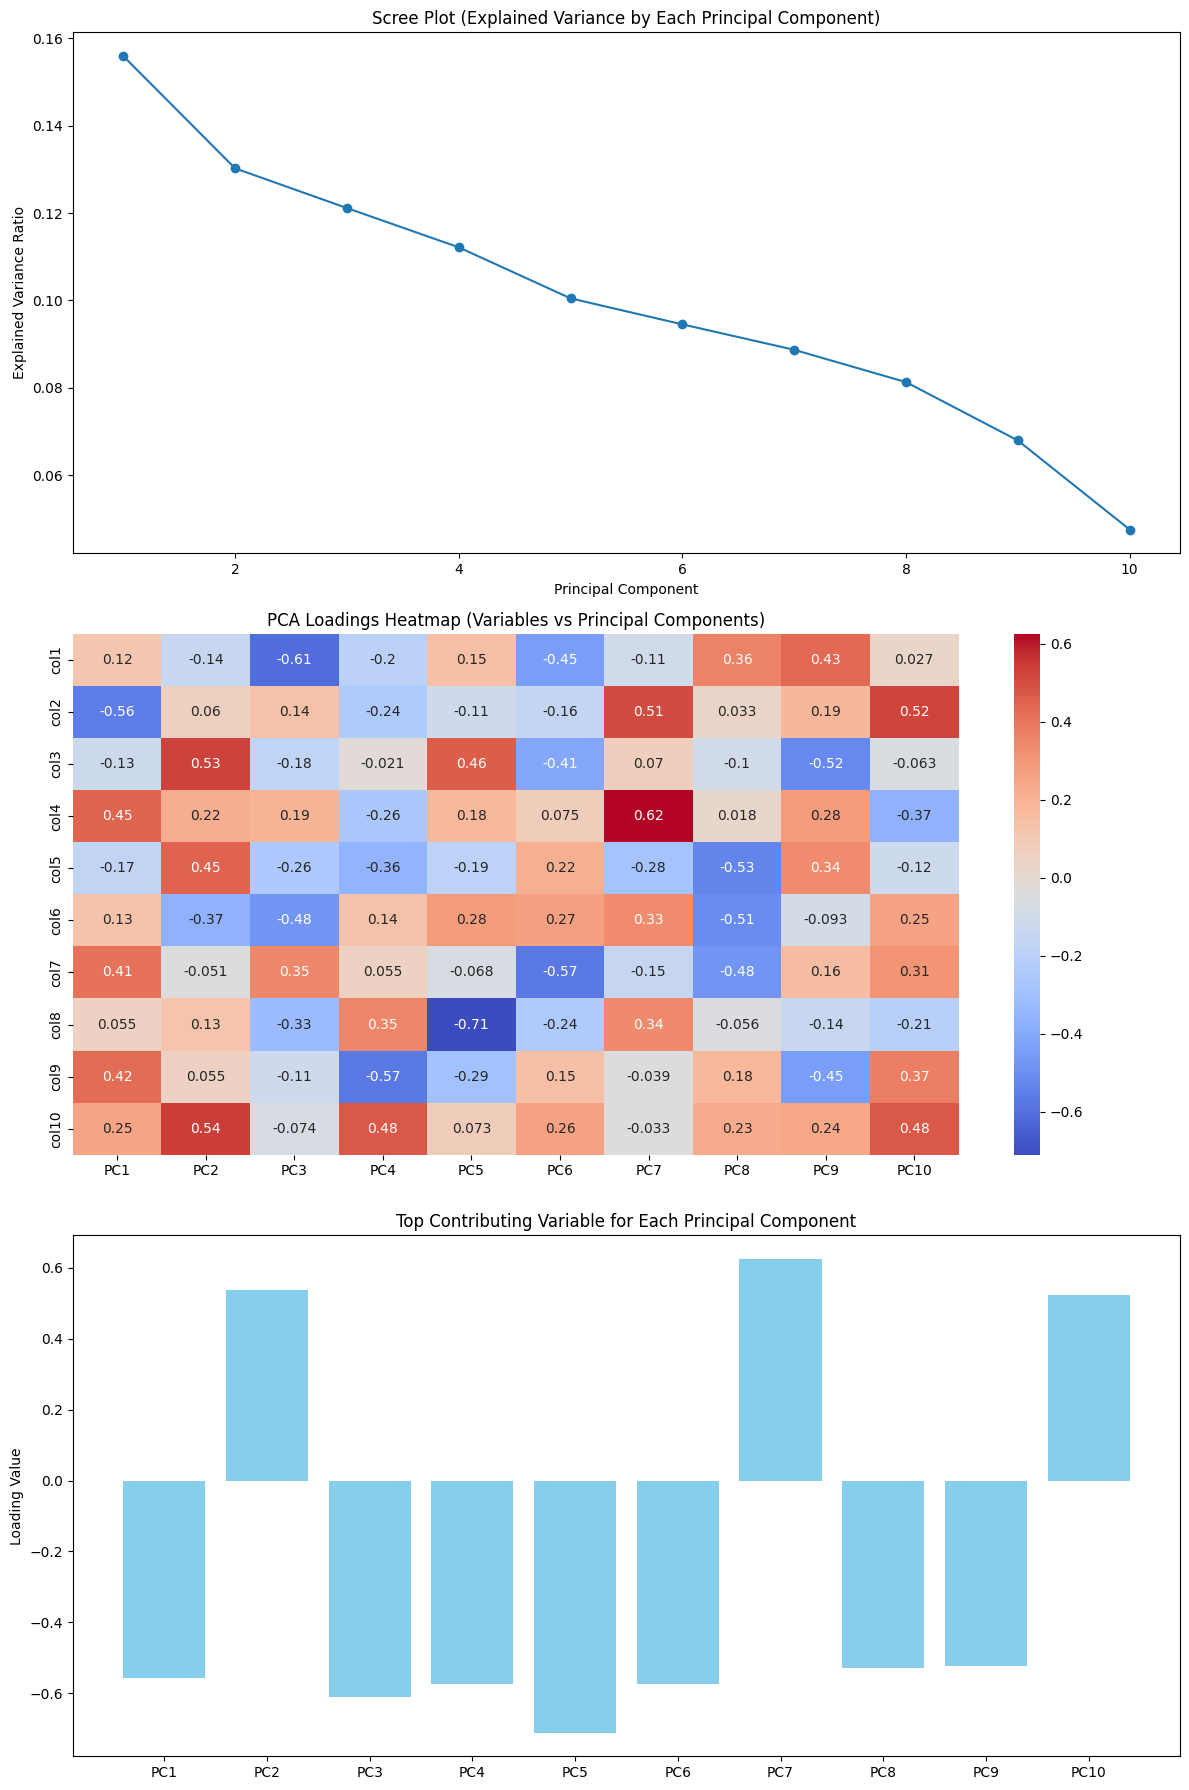

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 데이터 생성
np.random.seed(42)
df = pd.DataFrame(np.random.randn(100, 10), columns=[f'col{i+1}' for i in range(10)])

# 2. 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. PCA 수행
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# 4. 로딩값 계산
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(10)],
                        index=df.columns)

# 5. 시각화
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# (1) Scree Plot
explained_variance = pca.explained_variance_ratio_
axes[0].plot(range(1, 11), explained_variance, marker='o')
axes[0].set_title('Scree Plot (Explained Variance by Each Principal Component)')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')

# (2) Heatmap of Loadings
sns.heatmap(loadings, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('PCA Loadings Heatmap (Variables vs Principal Components)')

# (3) Bar plot of top contributing variable for each PC
top_vars = loadings.abs().idxmax()
top_vals = [loadings.loc[top_vars[f'PC{i+1}'], f'PC{i+1}'] for i in range(10)]
axes[2].bar([f'PC{i+1}' for i in range(10)], top_vals, color='skyblue')
axes[2].set_title('Top Contributing Variable for Each Principal Component')
axes[2].set_ylabel('Loading Value')

plt.tight_layout()
plt.show()
